<a href="https://colab.research.google.com/github/bhargav23/EVA4/blob/master/S8/EVA_S8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA/S7')


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [0]:
import evadataloader
dataloader = evadataloader.DataLoader()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = dataloader.load(trainset)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = dataloader.load(testset)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



 bird   cat truck  deer


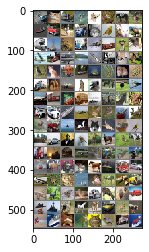

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import resnet

net = resnet.ResNet18()

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [0]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import copy

In [0]:
import evascheduler

In [0]:
from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    # scheduler.step()
    test(model, device, testloader)


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.874976634979248 Batch_id=390 Accuracy=54.38: 100%|██████████| 391/391 [00:29<00:00, 14.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4104, Accuracy: 5896/10000 (58.96%)

EPOCH: 1


Loss=0.6917199492454529 Batch_id=390 Accuracy=74.15: 100%|██████████| 391/391 [00:29<00:00, 14.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2878, Accuracy: 7122/10000 (71.22%)

EPOCH: 2


Loss=0.38208338618278503 Batch_id=390 Accuracy=82.44: 100%|██████████| 391/391 [00:29<00:00, 14.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2307, Accuracy: 7693/10000 (76.93%)

EPOCH: 3


Loss=0.4924873411655426 Batch_id=390 Accuracy=87.48: 100%|██████████| 391/391 [00:28<00:00, 14.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2214, Accuracy: 7786/10000 (77.86%)

EPOCH: 4


Loss=0.45961707830429077 Batch_id=390 Accuracy=91.53: 100%|██████████| 391/391 [00:29<00:00, 14.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2142, Accuracy: 7858/10000 (78.58%)

EPOCH: 5


Loss=0.14663353562355042 Batch_id=390 Accuracy=94.90: 100%|██████████| 391/391 [00:29<00:00, 14.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1916, Accuracy: 8084/10000 (80.84%)

EPOCH: 6


Loss=0.09627203643321991 Batch_id=390 Accuracy=96.43: 100%|██████████| 391/391 [00:29<00:00, 14.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2133, Accuracy: 7867/10000 (78.67%)

EPOCH: 7


Loss=0.1030488833785057 Batch_id=390 Accuracy=97.77: 100%|██████████| 391/391 [00:29<00:00, 14.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1963, Accuracy: 8037/10000 (80.37%)

EPOCH: 8


Loss=0.20436063408851624 Batch_id=390 Accuracy=98.29: 100%|██████████| 391/391 [00:28<00:00, 14.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2058, Accuracy: 7942/10000 (79.42%)

EPOCH: 9


Loss=0.06085644289851189 Batch_id=390 Accuracy=98.37: 100%|██████████| 391/391 [00:29<00:00, 14.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2170, Accuracy: 7830/10000 (78.30%)

EPOCH: 10


Loss=0.02381427213549614 Batch_id=390 Accuracy=99.00: 100%|██████████| 391/391 [00:29<00:00, 14.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1768, Accuracy: 8232/10000 (82.32%)

EPOCH: 11


Loss=0.0042948126792907715 Batch_id=390 Accuracy=99.39: 100%|██████████| 391/391 [00:29<00:00, 14.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1824, Accuracy: 8176/10000 (81.76%)

EPOCH: 12


Loss=0.0030607283115386963 Batch_id=390 Accuracy=99.73: 100%|██████████| 391/391 [00:29<00:00, 14.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1606, Accuracy: 8394/10000 (83.94%)

EPOCH: 13


Loss=0.009689444676041603 Batch_id=390 Accuracy=99.96: 100%|██████████| 391/391 [00:29<00:00, 14.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1536, Accuracy: 8464/10000 (84.64%)

EPOCH: 14


Loss=0.00012387036986183375 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 14.41it/s]



Test set: Average loss: 0.1492, Accuracy: 8508/10000 (85.08%)

